<a href="https://colab.research.google.com/github/StefanFischer/SAKI-Project1/blob/main/ner_4_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir( "/content/gdrive/MyDrive/flair" ) 

In [ ]:
pip install flair

     |████████████████████████████████| 286kB 3.0MB/s 
     |████████████████████████████████| 2.3MB 15.4MB/s 
     |████████████████████████████████| 798kB 21.8MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 983kB 32.1MB/s 
     |████████████████████████████████| 19.7MB 1.6MB/s 
     |████████████████████████████████| 1.2MB 31.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.3MB 28.0MB/s 
     |████████████████████████████████| 901kB 32.4MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=b393e5745fbc0a3d1ffc7a7ad5a1bb40be30c4ac15d6c47449e5f351b3fee52d
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for mpld3: filename=

In [ ]:
from flair.data import Corpus
from flair.data_fetcher import NLPTaskDataFetcher

downsample = 1.0 # 1.0 is full data, try a much smaller number like 0.01 to test run the code
data_folder = os.getcwd()
columns = {0: 'text', 1: 'ner'}

# 1. get the corpus
corpus: Corpus = NLPTaskDataFetcher.load_column_corpus(data_folder, columns,
                                                             train_file='training_data.csv',
                                                             test_file='test_data.csv',
                                                           dev_file=None).downsample(downsample)
print(corpus)

2021-05-26 12:39:28,327 Reading data from /content/gdrive/My Drive/flair
2021-05-26 12:39:28,332 Train: /content/gdrive/My Drive/flair/training_data.csv
2021-05-26 12:39:28,334 Dev: None
2021-05-26 12:39:28,340 Test: /content/gdrive/My Drive/flair/test_data.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated function (or staticmethod) load_column_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  if sys.path[0] == '':


Corpus: 6428 train + 714 dev + 3167 test sentences


Now, we have loaded __flair__ and our data.<br>
Next, we train models for __NER__.<br>
Inform yourselves on [Embeddings](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md) in Flair.<br>
__Question 1__: What happens when we stack embeddings?<br> The embeddings get concatenated to one embedding vector

How does this influence computational running time and accuracy?<br> Those stacked embeddings give better predictions, but also need longer running time
What does the __hidden_size__ of the __SequenceTagger__ reference?<br>
What happens when you increase/decrease the __hidden_size__?

In [ ]:
# 4. initialize embeddings. Experiment with different embedding types to see what gets the best results
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings,FlairEmbeddings, CharacterEmbeddings

embedding_types = [
    #WordEmbeddings('glove'),
    # comment in this line to use character embeddings
    CharacterEmbeddings(),

    # comment in these lines to use flair embeddings (needs a LONG time to train :-)
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tag_dictionary = corpus.make_tag_dictionary(tag_type='ner')

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type='ner',
                                        use_crf=True)

Start Training

In [ ]:
# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

model_name = 'flair_glove'

trainer.train(model_name,
              learning_rate=0.001,
              mini_batch_size=50,
              #anneal_factor=0.5,
              #patience=5,
              #anneal_with_restarts=True,
              max_epochs=20)

2021-05-26 15:24:54,259 ----------------------------------------------------------------------------------------------------
2021-05-26 15:24:54,263 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): CharacterEmbeddings(
      (char_embedding): Embedding(275, 25)
      (char_rnn): LSTM(25, 25, bidirectional=True)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Li

2021-05-26 15:24:12,670 ----------------------------------------------------------------------------------------------------
2021-05-26 15:24:12,678 WARNING: No LOSS found for test split in this data.
2021-05-26 15:24:12,684 Are you sure you want to plot LOSS and not another value?
2021-05-26 15:24:12,689 ----------------------------------------------------------------------------------------------------
2021-05-26 15:24:12,719 ----------------------------------------------------------------------------------------------------
2021-05-26 15:24:12,723 WARNING: No F1 found for test split in this data.
2021-05-26 15:24:12,728 Are you sure you want to plot F1 and not another value?
2021-05-26 15:24:12,732 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /content/gdrive/My Drive/flair/flair_glove/training.png


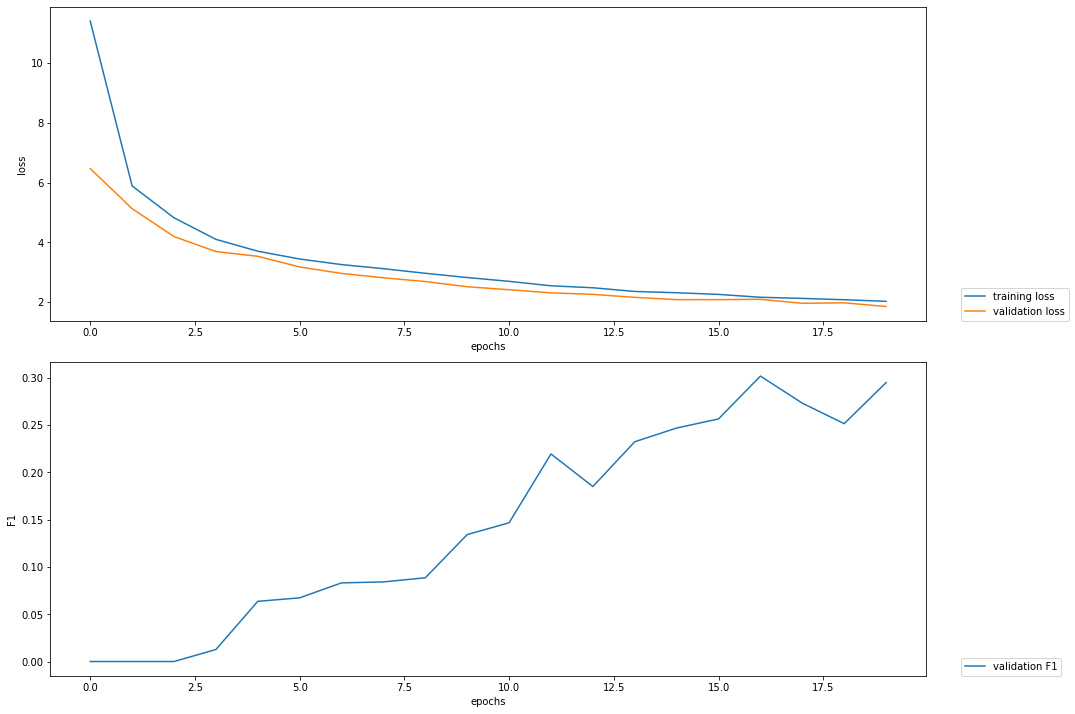

In [ ]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves( os.getcwd() + '/flair_glove/loss.tsv')

__Question 2__: Suggest, how could you improve the F1-value?<br>
Are 5 epochs enough for training?<br>
How could you speed up computation?